In [1]:
from ScatterSim.NanoObjects import SphereNanoObject, PolydisperseNanoObject
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def form_factor_slices(smod, qmax):
    ''' Compute the xy, xz, and yz projections.
    
    '''
    q = np.linspace(-qmax, qmax,100)
    QROWS, QCOLS = np.meshgrid(q,q, indexing="ij")
    Q0 = QROWS*0
    P2_xy = smod.form_factor_squared(np.array([QCOLS, QROWS, Q0]))
    P2_yz = smod.form_factor_squared(np.array([Q0, QCOLS, QROWS]))
    P2_xz = smod.form_factor_squared(np.array([QROWS, QCOLS, Q0]))

    return P2_xy, P2_yz, P2_xz

def show_qslices(F_xy, F_xz, F_yz, length, num=4, **kwargs):
    '''plot the xy, xz, and yz projections with length used from 
        projections function, in figure num
        
        slices go from -2pi/length to +2pi/length
    '''
    extent = 2*np.pi/length*np.array([-1, 1, -1, 1])
    plt.figure(num);plt.clf();
    plt.subplot(2,2,1)
    plt.title("x-y plane")
    plt.imshow(F_xy,extent=extent, **kwargs)
    plt.subplot(2,2,2)
    plt.title("x-z plane")
    plt.imshow(F_xz,extent=extent, **kwargs)
    plt.subplot(2,2,3)
    plt.title("y-z plane")
    plt.imshow(F_yz,extent=extent, **kwargs)
    

def show_projections(V_xy, V_xz, V_yz, length, num=4):
    '''plot the xy, xz, and yz projections with length used from 
        projections function, in figure num
        projections go from -length to +length
    '''
    extent = [-length, length, length, -length]
    plt.figure(num);plt.clf();
    plt.subplot(2,2,1)
    plt.title("x-y plane")
    plt.imshow(V_xy,extent=extent)
    plt.subplot(2,2,2)
    plt.title("x-z plane")
    plt.imshow(V_xz,extent=extent)
    plt.subplot(2,2,3)
    plt.title("y-z plane")
    plt.imshow(V_yz,extent=extent)

In [3]:
# Definining a sphere is simple
pargs_sphere = {'radius' : 1}
sphere = SphereNanoObject(pargs_sphere)

# You can also define a NanoObject with a stochastic parameter
# in this case, we'll make a polydisperse sphere
# The varied parameter will be the radius
pargs_polysphere = dict(radius= 1, sigma_R=.04) # (alternate way of defining dictionaries)
# Just give the object the class you're interested in, and tell it what the parameter it
# is you're varying
# The parameter is assumed to be sampled from a Gaussian distribution of mean 'argname'
# and standard deviation (sigma) 'sigma_R'
polysphere = PolydisperseNanoObject(SphereNanoObject, pargs_polysphere, argname='radius', argstdname='sigma_R')



# Now choose a q domain for the plotting. The units of q will be the inverse of units you supply
# as parameters to the object. For example, we used nanometers, so q will be in inverse nanometers
q = np.linspace(0, 10, 1000)

# finally, calculate
sq_sphere = sphere.form_factor_squared_isotropic(q)
# The polydisperse sphere should take roughly 21 times longer. This is because
# by default it computes the form factors of spheres of radii from 21 points in the distribution
# You can change this, and even change the distribution by reading more into the code
# of NanoObjects.PolydisperseNanoObject
sq_polysphere = polysphere.form_factor_squared_isotropic(q)


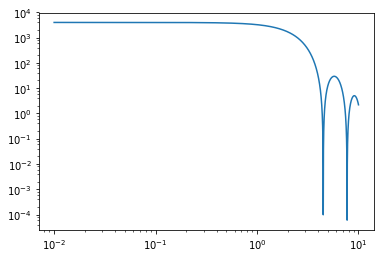

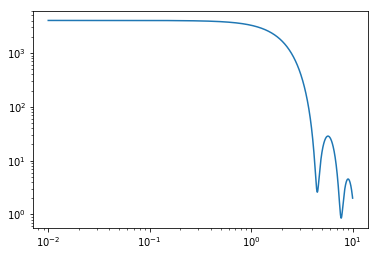

In [4]:
# plot using your favorite plotting library
plt.figure(0);
plt.clf()
plt.loglog(q, sq_sphere)


# even with a small polydispersity (4%), polydisperse sphere scattering looks much different
plt.figure(1);
plt.clf()
plt.loglog(q, sq_polysphere)

In [5]:
# For any object, you can compute the form factor or projection. See functions
# above on how to do it.
# P2 means |P|^2 (form factor squared)
qmax = 10
P2_xy, P2_yz, P2_xz = form_factor_slices(sphere, qmax)
rmax = 1.5
V_xy, V_yz, V_xz = sphere.projections(rmax)

In [6]:
# remember this is a 3D Object. We can look at projections of the object in real space
# or slices of the scattering in Fourier (reciprocal) space 

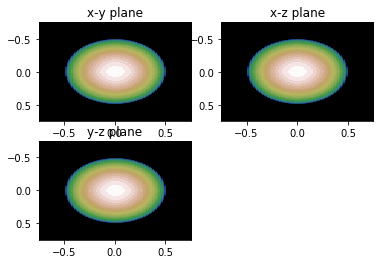

In [7]:
show_projections(V_xy, V_yz, V_xz, rmax, 3)

In [8]:
# Showing the form factor

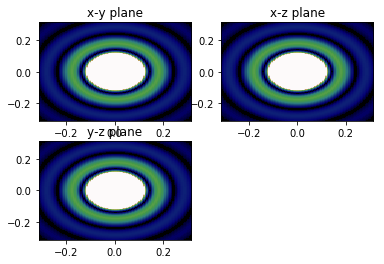

In [9]:
show_qslices(P2_xy, P2_yz, P2_xz, qmax, 2, vmin=0, vmax=6e1)